<a href="https://colab.research.google.com/github/hstorm/ML_course_Calabria2020/blob/master/Calabria_labIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro notebook for the course: "Machine Learning for Applied Economics and Policy"

#### Instructors
- Kathy Baylis
- Giovanni Cerulli
- Gianluigi Greco
- Thomas Heckelei
- Hugo Storm

#### Description
This notebook is intended to get you familiar with some of the most common data science / ML libaries typically used in python. 
In this notebook you will 1) load data, 2) prepare the data for running your models, 3) run a simple logistic regression, 4) run a very simiple neural network, and 5) compare the results of the two models. You will learn in the course that a logistic regression is actually a special case of a very simple neural network! So if you have run a logistic regression you have actually worked with NN... 

Work Steps

1. (If you are reading this in Github and haven't yet opened it in colab,) Open this notebook in google colab (https://colab.research.google.com/) using the link provided above. To run the notebook you need to have a google account. 

2. Execute all code cells below (Runtime/Run all) and try to understand what is going on.

3. Two important python libraries for working with data in python are numpy and pandas 
    There are plenty of tutorials online to get you a first idea of how they work. Two examples are provided here. For taking the course you do not have to be an expert in using those libraries but having a first basic understanding of the functionality will certainly help you to follow the examples. 
    
- Numpy: https://www.datacamp.com/community/tutorials/python-numpy-tutorial

- Pandas: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min   

4. (Optional) Play around with the notebook and make some changes (no worries you can not break it...). Here are some ideas what you can try to achieve:

- In the data set there are many more variables. Figure out how they are named and add a couple more variables to two models. Run the models and see how this changes the quality of the model prediction (in terms of R²). 

-  If you want to go a step further... Create some new variables by adding interaction terms or square/cube terms. See if this increases model performance (R²).

- Are you up for the challenge (before even starting with the course)? The sklearn libary implements a large number of ML models. We will cover the most important ones in this course. In this notebook you have already seen how to use the logistic regression or a neural network in sklearn. Try to adjust the code to run an additional model, for example a random forest (will be covered on day 2 in the course). There are plenty of tutorials online (for example https://www.datacamp.com/community/tutorials/random-forests-classifier-python). Hint: there is basically only one line of code that you need to change in order to run an random forest with sklearn instead of a logistic regression. 

#### Load relevant libs

In [11]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stat
from scipy.stats import norm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import data

In [12]:
# Download data
!wget http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv

--2020-07-06 23:20:05--  http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv
Resolving www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)... 131.220.69.2
Connecting to www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)|131.220.69.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789226067 (753M) [application/octet-stream]
Saving to: ‘brazil_all_data_v2.csv.1’

brazil_all_data_v2. 100%[===================>] 752.66M  5.30MB/s    in 2m 16s  

2020-07-06 23:22:21 (5.53 MB/s) - ‘brazil_all_data_v2.csv.1’ saved [789226067/789226067]



In [13]:
# Load data with pandas into a dataframe 
df = pd.read_csv('brazil_all_data_v2.csv')

#### Setup dependent and explantory variables

In [14]:
# Define binary variable for deforestration called D_defor_2018 from defor_2018
df['D_defor_2018'] = df['defor_2018']>0

In [15]:
# Add a variable, called constant, with only ones to the dataframe
df['constant'] = 1

In [16]:
# View first 5 rows of the data
df.head(5)

,id,row,col,lon,lat,bean,carrot,cassava,chickpea,citrus,coffee,groundnut,maize,soy,sugarcane,tomato,wheat,perc_treecover,perm_water,travel_min,defor_2001,defor_2002,defor_2003,defor_2004,defor_2005,defor_2006,defor_2007,defor_2008,defor_2009,defor_2010,defor_2011,defor_2012,defor_2013,defor_2014,defor_2015,defor_2016,defor_2017,defor_2018,wdpa_1990,wdpa_1991,...,tot_defor_2018_lag_1st_order,tot_defor_2001_lag_2nd_order,tot_defor_2002_lag_2nd_order,tot_defor_2003_lag_2nd_order,tot_defor_2004_lag_2nd_order,tot_defor_2005_lag_2nd_order,tot_defor_2006_lag_2nd_order,tot_defor_2007_lag_2nd_order,tot_defor_2008_lag_2nd_order,tot_defor_2009_lag_2nd_order,tot_defor_2010_lag_2nd_order,tot_defor_2011_lag_2nd_order,tot_defor_2012_lag_2nd_order,tot_defor_2013_lag_2nd_order,tot_defor_2014_lag_2nd_order,tot_defor_2015_lag_2nd_order,tot_defor_2016_lag_2nd_order,tot_defor_2017_lag_2nd_order,tot_defor_2018_lag_2nd_order,tot_defor_2001_lag_3rd_order,tot_defor_2002_lag_3rd_order,tot_defor_2003_lag_3rd_order,tot_defor_2004_lag_3rd_order,tot_defor_2005_lag_3rd_order,tot_defor_2006_lag_3rd_order,tot_defor_2007_lag_3rd_order,tot_defor_2008_lag_3rd_order,tot_defor_2009_lag_3rd_order,tot_defor_2010_lag_3rd_order,tot_defor_2011_lag_3rd_order,tot_defor_2012_lag_3rd_order,tot_defor_2013_lag_3rd_order,tot_defor_2014_lag_3rd_order,tot_defor_2015_lag_3rd_order,tot_defor_2016_lag_3rd_order,tot_defor_2017_lag_3rd_order,tot_defor_2018_lag_3rd_order,s,D_defor_2018,constant
0,0,0,0,-59.989876,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.761093,1.0,2612.6440,0.0,0.0,0.000000,0.009531,0.000000,0.000000,0.000000,0.002500,0.000000,0.000312,0.000000,0.000625,0.000312,0.000000,0.000000,0.000000,0.009531,0.000000,0.0,0.0,...,0.800000,0.000000,0.000000,10.625000,26.499998,17.500000,2.625000,2.125000,37.375000,1.125000,2.500000,2.500000,11.625000,0.625000,4.125000,4.875000,4.250000,9.875000,1.125000,0.000000,0.000000,5.800000,14.333333,9.800000,1.533333,1.333333,20.000000,0.800000,1.800000,1.333333,6.866667,0.733333,2.200000,4.466667,9.866667,6.600000,0.800000,1,False,1
1,1,0,1,-59.969875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.777657,1.0,2680.3191,0.0,0.0,0.013125,0.008437,0.011875,0.003125,0.000781,0.046719,0.001094,0.002812,0.000000,0.002188,0.000625,0.002344,0.006094,0.000937,0.006562,0.001406,0.0,0.0,...,2.000000,0.000000,0.000000,0.272727,19.999998,5.818181,0.272727,1.363636,1.545454,0.363636,0.363636,1.818182,7.909091,0.818182,1.636364,1.272727,12.909090,10.181818,0.000000,0.000000,0.000000,0.157895,12.052631,3.842105,0.157895,0.894737,0.894737,1.000000,1.052631,2.000000,5.105263,0.526316,0.947368,1.473684,9.473684,6.210527,2.000000,1,True,1
2,2,0,2,-59.949875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.766403,1.0,2796.3284,0.0,0.0,0.000000,0.024531,0.009375,0.000000,0.000156,0.000000,0.000000,0.000000,0.000312,0.000156,0.000000,0.000000,0.000000,0.001719,0.005313,0.000000,0.0,0.0,...,5.173913,0.000000,0.000000,6.214286,8.785713,5.857143,1.642857,1.500000,22.571428,1.785714,2.214286,2.571429,7.142858,1.000000,2.357143,3.785714,12.500000,8.571429,3.142857,0.086957,1.826087,6.869565,7.086957,8.260869,1.782609,4.347826,18.043478,1.956522,3.652174,1.652174,5.913043,4.086957,4.521739,4.956522,8.695652,11.217392,5.173913,1,False,1
3,3,0,3,-59.929874,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.814842,1.0,2920.0164,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000156,0.000000,0.000000,0.000000,0.000469,0.000000,0.000000,0.002188,0.017812,0.000469,0.000000,0.0,0.0,...,6.518518,0.142857,2.928571,11.285714,18.214285,17.214285,2.928571,6.142857,28.428572,3.142857,5.357143,2.785714,8.428572,5.857142,7.214285,6.142857,6.785714,15.785715,8.214286,1.222222,2.777778,5.925926,12.185184,10.740741,2.074074,4.37037

In [17]:
# Define the dependent variable
Y = df['D_defor_2018']
# Define a list of variable names for explanatory variables
lstCols = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  # 'pasture',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  # 'pasture_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
#  'bean',
#  'carrot',
#  'cassava',
#  'chickpea',
#  'citrus',
#  'coffee',
#  'groundnut',
#  'maize',
#  'soy',
#  'sugarcane',
#  'tomato',
#  'wheat',
#  'defor_2001',
#  'defor_2002',
#  'defor_2003',
#  'defor_2004',
#  'defor_2005',
#  'defor_2006',
#  'defor_2007',
#  'defor_2008',
#  'defor_2009',
#  'defor_2010',
#  'defor_2011',
#  'defor_2012',
#  'defor_2013',
#  'defor_2014',
#  'defor_2015',
#  'defor_2016',
#  'defor_2017',
#  'near_dist_km',
#  'mean_elev_mts',
#  'sd_elev_mts',
 ]

# Get the explanatory Variables
X =  df.loc[:,lstCols]



# Check the data with exploratory data analysis(eda)

In [18]:
# check data  type
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249940 entries, 0 to 249939
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   wdpa_2017                      249940 non-null  float64
 1   population_2015                249940 non-null  float64
 2   chirps_2017                    249940 non-null  float64
 3   defor_2017                     249940 non-null  float64
 4   maize                          249940 non-null  float64
 5   soy                            249940 non-null  float64
 6   sugarcane                      249940 non-null  float64
 7   perc_treecover                 249940 non-null  float64
 8   perm_water                     249940 non-null  float64
 9   travel_min                     249940 non-null  float64
 10  cropland                       249940 non-null  float64
 11  mean_elev                      249940 non-null  float64
 12  sd_elev                       

Text(0.5, 1.0, 'Correlation matrix of explanotry variables')

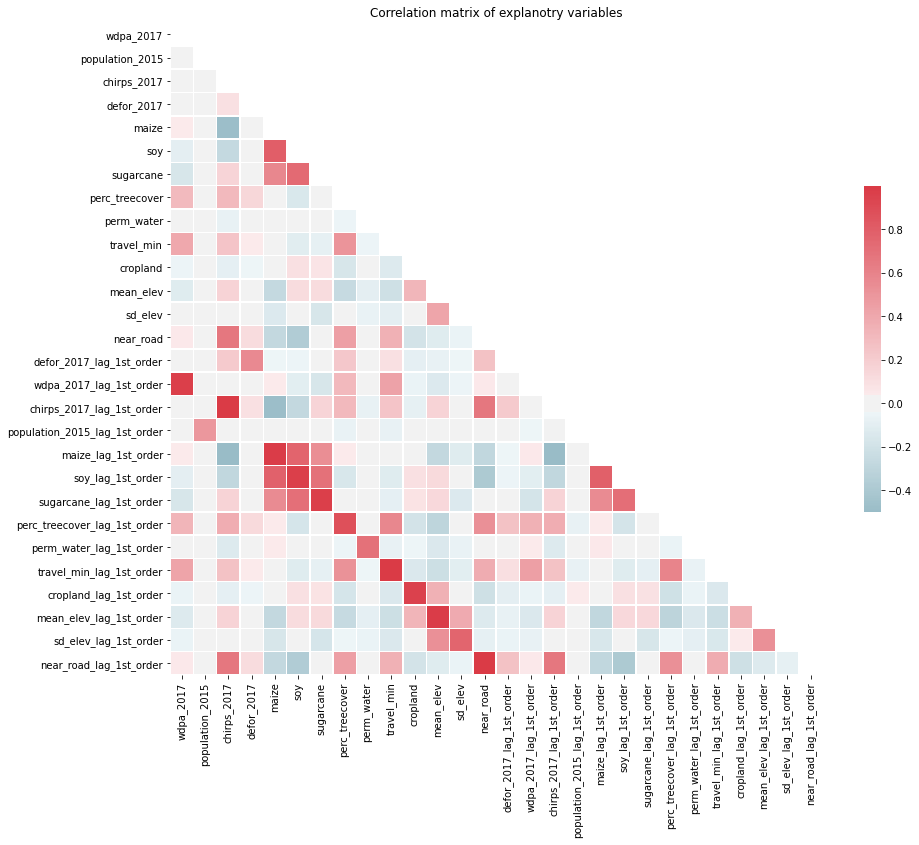

In [27]:

# Correlation between explanotry variables

X_corr = X.corr()
mask = np.triu(np.ones_like(X_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(X_corr,mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix of explanotry variables")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2244247240>,
      dtype=object)

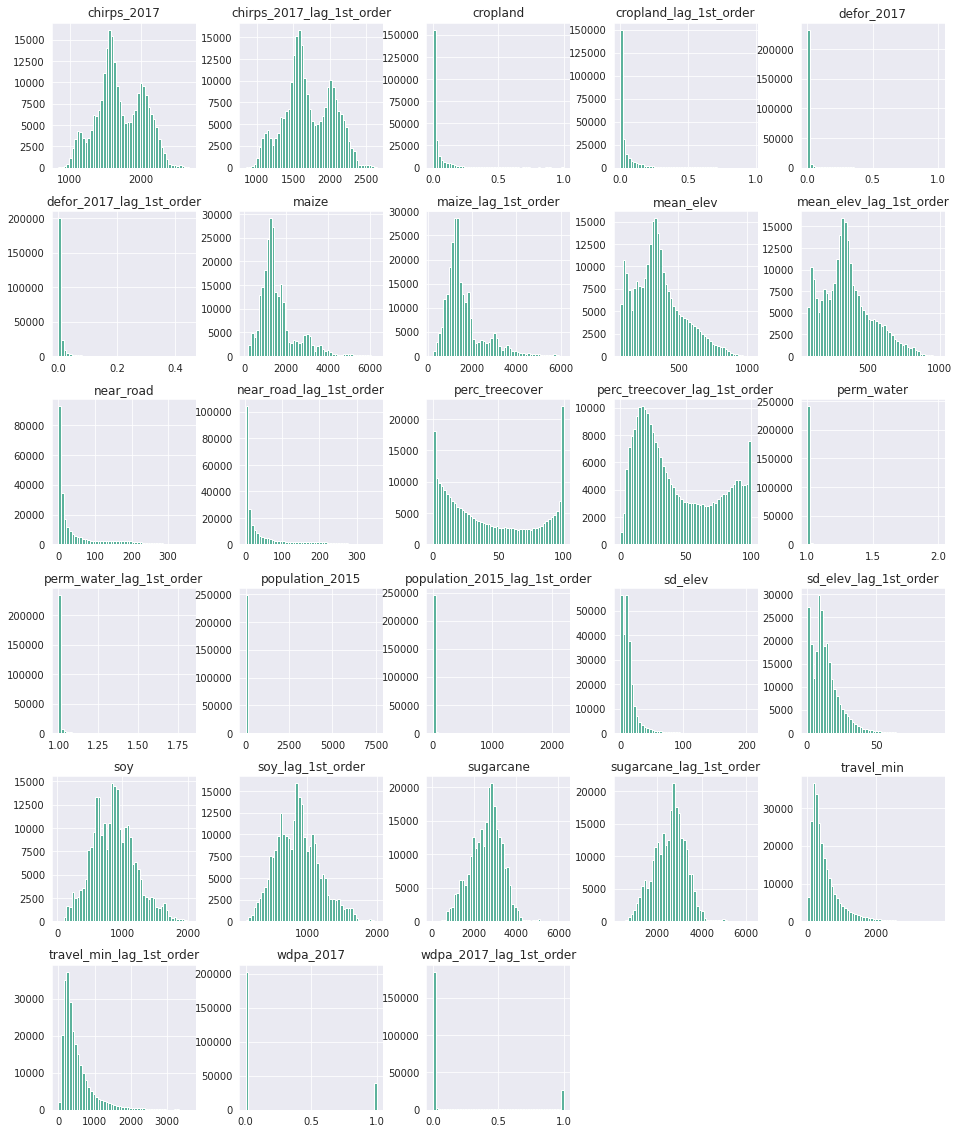

In [28]:
# check the distribution of the explanatory variables
sns.set_style("darkgrid"),
X.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10, color='#5cb29c')

[Text(0, 0.5, 'Percent(%)')]

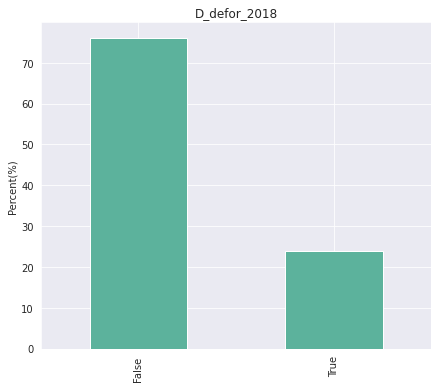

In [30]:
# bar plot of the dependent variable ,
ax = (Y.value_counts(normalize=True)*100).plot(kind='bar',figsize=(7, 6), title='D_defor_2018', color='#5cb29c')
ax.set(ylabel="Percent(%)")

In [ ]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly splits the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X_train_raw.head(5)

,wdpa_2017,population_2015,chirps_2017,defor_2017,maize,soy,sugarcane,perc_treecover,perm_water,travel_min,cropland,mean_elev,sd_elev,near_road,defor_2017_lag_1st_order,wdpa_2017_lag_1st_order,chirps_2017_lag_1st_order,population_2015_lag_1st_order,maize_lag_1st_order,soy_lag_1st_order,sugarcane_lag_1st_order,perc_treecover_lag_1st_order,perm_water_lag_1st_order,travel_min_lag_1st_order,cropland_lag_1st_order,mean_elev_lag_1st_order,sd_elev_lag_1st_order,near_road_lag_1st_order
211019,0.000000,1.743300,1140.8701,0.000156,5145.0000,1725.00000,3498.0,95.500000,1.0,386.034120,0.105000,233.27431,7.357755,3.982380,0.002949,0.033602,1153.6166,1.734069,4604.9746,1573.41600,3080.0693,88.958664,1.000000,475.483760,0.074437,251.05762,12.067036,4.300830
152100,0.000000,0.497108,1494.5341,0.000000,1418.8333,566.83337,2012.0,0.321094,1.0,52.908264,0.019833,127.98780,1.093633,3.355971,0.002728,0.000000,1499.3014,0.540844,1446.2916,584.61456,2058.0938,17.326862,1.002894,71.333534,0.023635,128.69191,2.285338,2.511065
71133,0.000000,0.120582,1922.1539,0.004062,1189.6666,700.00000,2763.0,90.612343,1.0,491.777890,0.011000,323.18399,7.377765,64.657524,0.004320,0.014956,1928.2488,0.095600,1189.5186,695.65045,2767.7256,89.219002,1.002949,639.929750,0.006477,316.10376,9.349813,64.806252
113252,0.938755,0.083385,1837.0503,0.000000,1189.0000,760.00000,2957.0,5.153281,1.0,218.281520,0.002000,471.76910,14.875660,2.990992,0.002210,0.500785,1850.5565,0.086631,1160.1609,743.83160,2938.7192,13.188030,1.000645,238.731700,0.011638,446.91449,9.372373,2.360994
32717,0.000000,0.340720,2036.5881,0.002656,1170.0000,631.00000,2845.0,92.805466,1.0,704.614990,0.004000,336.11801,9.273241,197.730700,0.027669,0.000000,2063.5518,0.690254,1148.6683,626.19678,2789.2783,77.084564,1.000000,693.703980,0.002519,352.24255,10.586811,197.779630


In [ ]:
# Scale data to 0-1 range using sklearn MinMaxScalar object. This facilitates training the model 
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar 
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data 
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

In [ ]:
traindf = pd.DataFrame(X_train)
traindf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000264,0.162163,0.000157,0.813011,0.850299,0.555788,0.955000,0.0,0.101330,0.105000,0.163486,0.035448,0.011118,0.006585,0.033602,0.169992,0.000790,0.740660,0.773393,0.466654,0.889646,0.000000,0.130121,0.077217,0.188011,0.122987,0.009348
1,0.000000,0.000075,0.353761,0.000000,0.215964,0.272372,0.316188,0.003211,0.0,0.013660,0.019833,0.052599,0.005269,0.009369,0.006091,0.000000,0.362836,0.000246,0.205607,0.249477,0.292944,0.173261,0.003568,0.017938,0.024518,0.053661,0.019159,0.004279
2,0.000000,0.000018,0.585425,0.004071,0.179245,0.338822,0.437278,0.906123,0.0,0.129159,0.011000,0.258179,0.035544,0.180510,0.009646,0.014956,0.602130,0.000044,0.162112,0.308310,0.413564,0.892249,0.003636,0.175768,0.006719,0.259428,0.094145,0.180721
3,0.938755,0.000013,0.539320,0.000000,0.179138,0.368762,0.468559,0.051533,0.0,0.057182,0.002000,0.414668,0.071667,0.008350,0.004935,0.500785,0.558788,0.000039,0.157139,0.333838,0.442628,0.131869,0.000795,0.064404,0.012072,0.403050,0.094385,0.003853
4,0.000000,0.000052,0.647420,0.002662,0.176094,0.304391,0.450500,0.928055,0.0,0.185172,0.004000,0.271801,0.044676,0.552020,0.061784,0.000000,0.677610,0.000314,0.155192,0.271510,0.417227,0.770894,0.000000,0.190694,0.002613,0.299106,0.107275,0.557350


In [ ]:
# Fit a logistic regression model using sklearn (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# Create the model object
modelLg = LogisticRegression(random_state=0,penalty='none',fit_intercept=True, max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Note: 
sklearn is a popular ML libary that we will primarily use in the course. While sklearn allows to run
regressions it does not provide regression table outputs (with p-values, standard errors etc.). 
While those table are very common in econometrics they are not commonly considered in the ML 
community. For illustrative puposes we do the calculation for a regrssion table manually, however,
there is also a "statsmodels" libary in python that does this automatically (see below). 

In [ ]:
# Function to calculate pvalues and standard errors for a scikit-learn logisticRegression
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    # m = len(model.coef_[0])
    # coefs = model.coef_[0]
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return se, p

In [ ]:
# Use the previously created function to create a regression output table
se, p = logit_pvalue(modelLg, X_train)
coefs = np.concatenate([modelLg.intercept_, modelLg.coef_[0]]).T
resCoef = pd.DataFrame(coefs,index=['constant']+lstCols)
resCoef.columns = ['coef']
resCoef['se'] = se
resCoef['pval'] = p
resCoef

,coef,se,pval
constant,-1.898514,0.034348,0.000000e+00
wdpa_2017,-0.453089,0.064172,1.658895e-12
population_2015,-0.478958,0.588701,4.158829e-01
chirps_2017,-1.223988,0.689961,7.606378e-02
defor_2017,13.976782,0.284723,0.000000e+00
maize,2.393496,0.771121,1.909752e-03
soy,-0.973235,0.576856,9.157727e-02
sugarcane,0.110815,0.509138,8.277005e-01
perc_treecover,0.652472,0.032820,0.000000e+00
perm_water,0.717640,0.262387,6.237201e-03


In [ ]:
# Confirm the results using statsmodels
import statsmodels.api as sm
# Add constant to X matrix
X_train_const = np.matrix(np.insert(np.array(X_train), 0, 1, axis = 1))

# Define the logit regression
logit = sm.Logit(Y_train,X_train_const)

# Set the names of the explanatory variables
logit.data.xnames = exog_names=['const']+lstCols

# fit the model
result = logit.fit()
# Print the summary table
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.469965
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           D_defor_2018   No. Observations:               199952
Model:                          Logit   Df Residuals:                   199923
Method:                           MLE   Df Model:                           28
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                  0.1455
Time:                        05:38:15   Log-Likelihood:                -93971.
converged:                       True   LL-Null:                   -1.0997e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.8960      0.034    -55.202      0.

## Train your first very (very) simple neural network using sklearn
Now use a neural network for the same problem. In the course you will see that this is actually equivalent to a logistic regression, hence a logistic regression is in fact a specific form of a neural network!

### Perform a hyper parameter search to tune the learning rate for training the NN. 
This step is optional and takes a while. You can also run the next cell, 
using a fixed learning rate. The learning rate was determined using this hyper parameter search.

In [ ]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'alpha':loguniform(1e-6, 1e-1)}

modelNN = MLPClassifier(solver='lbfgs', activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)


clf = RandomizedSearchCV(modelNN, param_grid, random_state=0,n_iter=10,cv=5)
modelNN = clf.fit(X_train_const, Y_train)
modelNN.best_params_

{'alpha': 8.264328927007723e-05}

### Train the Neural Network with a fixed set of hyperparameter

In [ ]:
modelNN = MLPClassifier(solver='lbfgs', alpha=8.264328927007723e-05,activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)

modelNN.fit(X_train_const, Y_train)

MLPClassifier(activation='identity', alpha=8.264328927007723e-05,
              batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
# Add the estimated coefficient of the NN to the regression table we created above-
# In the course we will discuss why the estimated coefficient are similar. 
#    modelNN.coefs_[0] are the coefficients of the first layer
#    modelNN.coefs_[1][0][0] is the coefficients of the hidden layer
resCoef['coef_NN'] = modelNN.coefs_[0]*modelNN.coefs_[1][0][0]
resCoef

,coef,se,pval,coef_NN
constant,-1.898514,0.034348,0.000000e+00,-0.208500
wdpa_2017,-0.453089,0.064172,1.658895e-12,-0.461436
population_2015,-0.478958,0.588701,4.158829e-01,0.290075
chirps_2017,-1.223988,0.689961,7.606378e-02,0.728851
defor_2017,13.976782,0.284723,0.000000e+00,13.774130
maize,2.393496,0.771121,1.909752e-03,0.565301
soy,-0.973235,0.576856,9.157727e-02,0.969879
sugarcane,0.110815,0.509138,8.277005e-01,-0.864923
perc_treecover,0.652472,0.032820,0.000000e+00,0.666131
perm_water,0.717640,0.262387,6.237201e-03,0.757252


### Compare the model outcomes

In [ ]:
# Add constant to the test data
X_test_const = np.matrix(np.insert(np.array(X_test), 0, 1, axis = 1))
# Get predicted values from logit model 
Y_test_Lg = modelLg.predict(X_test)
# Get predicted values from NN model 
Y_test_NN = modelNN.predict(X_test_const)

In [ ]:
score_Lg = np.sum(Y_test==Y_test_Lg)/Y_test.shape[0]
score_NN = np.sum(Y_test==Y_test_NN)/Y_test.shape[0]
print('Score lg (R²): ',score_Lg)
print('Score NN (R²): ',score_NN)

Score lg (R²):  0.7862887092902296
Score NN (R²):  0.7863487236936865


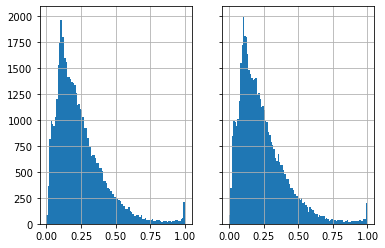

In [ ]:
# plot the predicte probabalities of the logit model
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pd.DataFrame(modelLg.predict_proba(X_test))[1].hist(bins=100,ax=ax1)
pd.DataFrame(modelNN.predict_proba(X_test_const))[1].hist(bins=100,ax=ax2)
fig.show()

### Well done!!! 
Now it is your turn. Play around with the notebook to make your very first steps with numpy/pandas and sklearn. In the intro text in the beginning there are some suggestions of what you can try.  